In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


In [2]:
%%time
from acs_plotting_maps import *
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib import colors, cm


CPU times: user 8.47 s, sys: 1.12 s, total: 9.59 s
Wall time: 11.4 s


In [3]:
%%time
var = "fire_climate_class"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL12.nc")[var]
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL15.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL2.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/bushfire/fire_climate_classes_AGCD-05i_MM_ssp370_v1-r1-ACS-NRNBC_GWL3.nc")[var]



CPU times: user 3.74 s, sys: 1.44 s, total: 5.18 s
Wall time: 7.79 s


(<Figure size 800x600 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x15141139e0e0>)

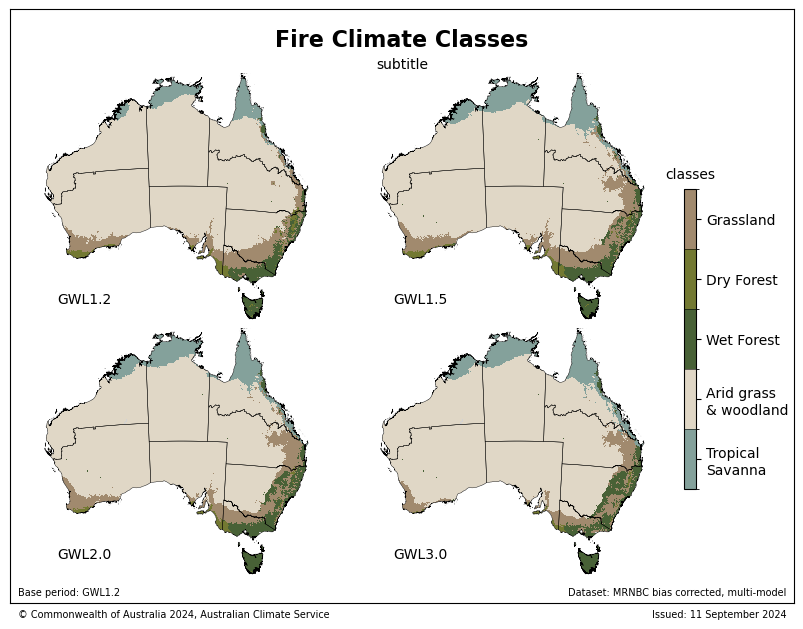

In [6]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                        title = "Fire Climate Classes",
                        baseline="GWL1.2",
                        cmap = cmap_dict["fire_climate"],
                        ticks = tick_dict["fire_climate_ticks"],
                        tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                        cbar_label = "classes",
                        dataset_name = "MRNBC bias corrected, multi-model",
                        watermark="",
                        figsize=(8, 6),
                        date_range="subtitle",
                       orientation="square",
                        )

(<Figure size 500x1200 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x151411249330>)

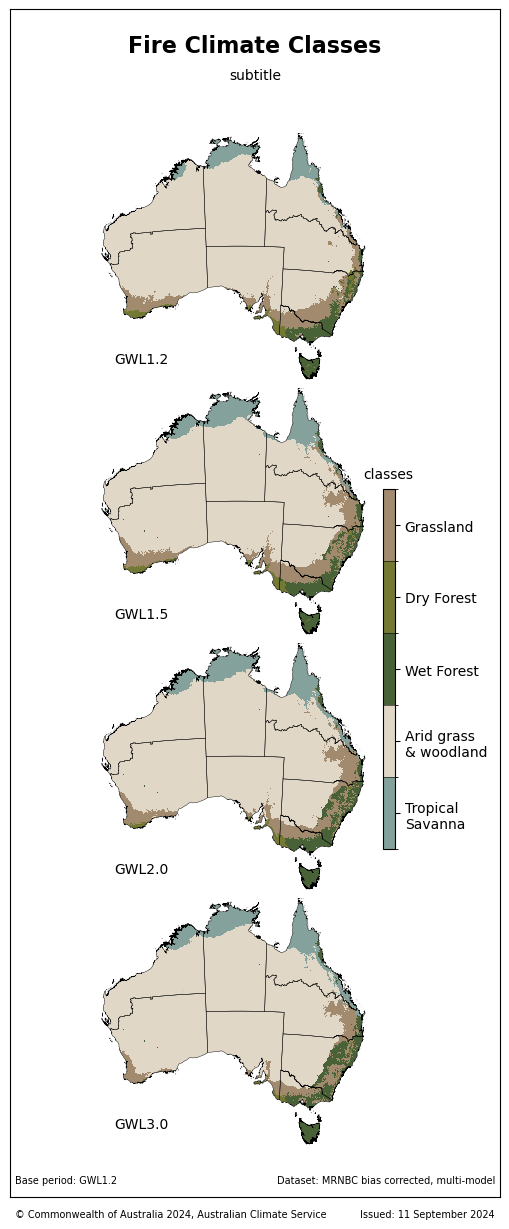

In [7]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    date_range="subtitle",
                    orientation="vertical",
                    )

(<Figure size 1000x300 with 6 Axes>,
 <matplotlib.colorbar.Colorbar at 0x153582fa1870>)

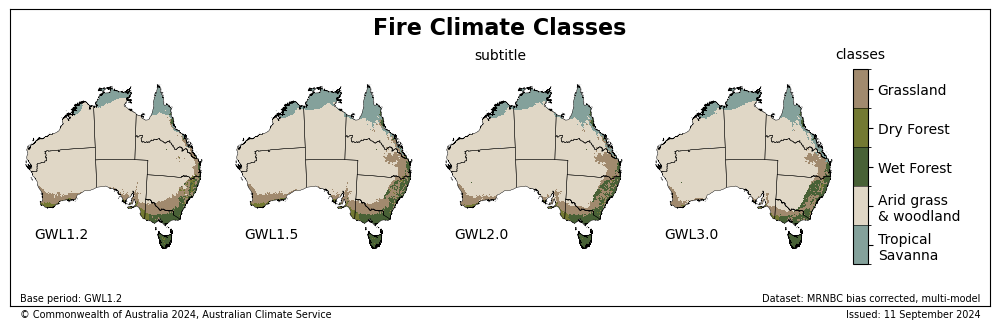

In [4]:
plot_acs_hazard_4pp(ds_gwl12=ds_gwl12,
                    ds_gwl15=ds_gwl15,
                    ds_gwl20=ds_gwl20,
                    ds_gwl30=ds_gwl30,
                    title = "Fire Climate Classes",
                    baseline="GWL1.2",
                    cmap = cmap_dict["fire_climate"],
                    ticks = tick_dict["fire_climate_ticks"],
                    tick_labels = ["Tropical\nSavanna","Arid grass \n& woodland","Wet Forest","Dry Forest","Grassland",],
                    cbar_label = "classes",
                    dataset_name = "MRNBC bias corrected, multi-model",
                    watermark="",
                    date_range="subtitle",
                    orientation="horizontal",
                    )

CPU times: user 2min 20s, sys: 296 ms, total: 2min 20s
Wall time: 2min 20s


(<Figure size 800x600 with 5 Axes>, <GeoAxes: >)

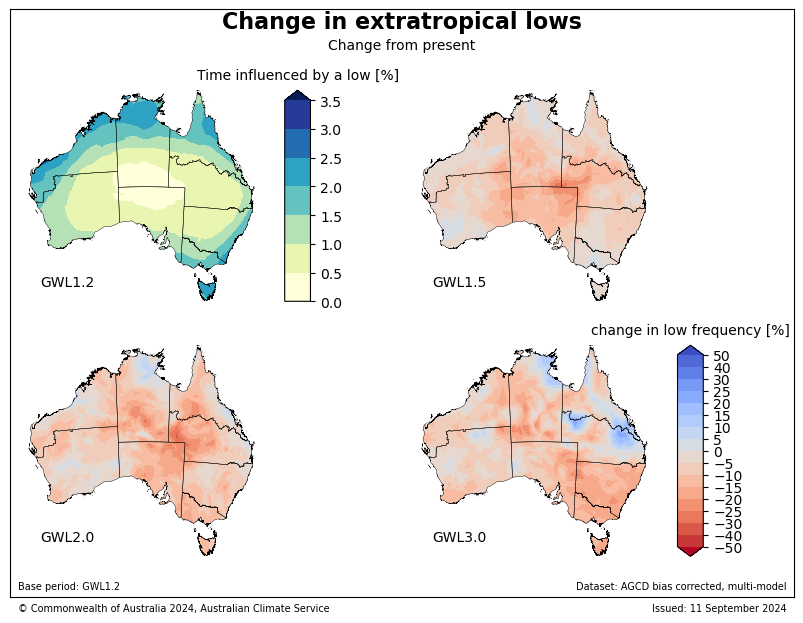

In [10]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="square"
                        )

CPU times: user 2min 23s, sys: 375 ms, total: 2min 24s
Wall time: 2min 24s


(<Figure size 1000x300 with 5 Axes>, <GeoAxes: >)

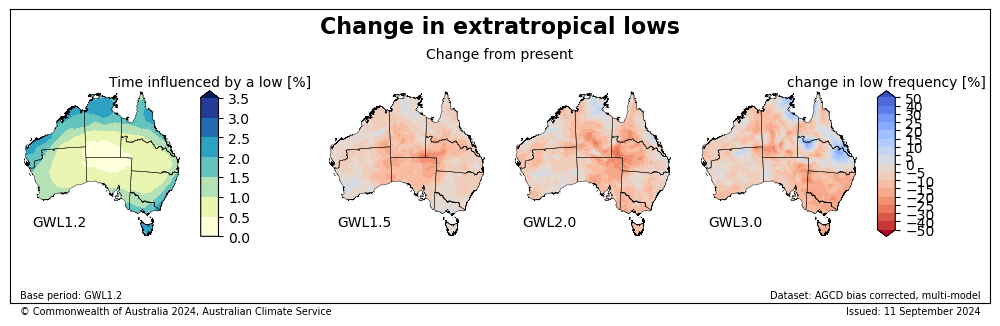

In [11]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="horizontal"
                        )

CPU times: user 2min 22s, sys: 311 ms, total: 2min 22s
Wall time: 2min 22s


(<Figure size 500x1200 with 5 Axes>, <GeoAxes: >)

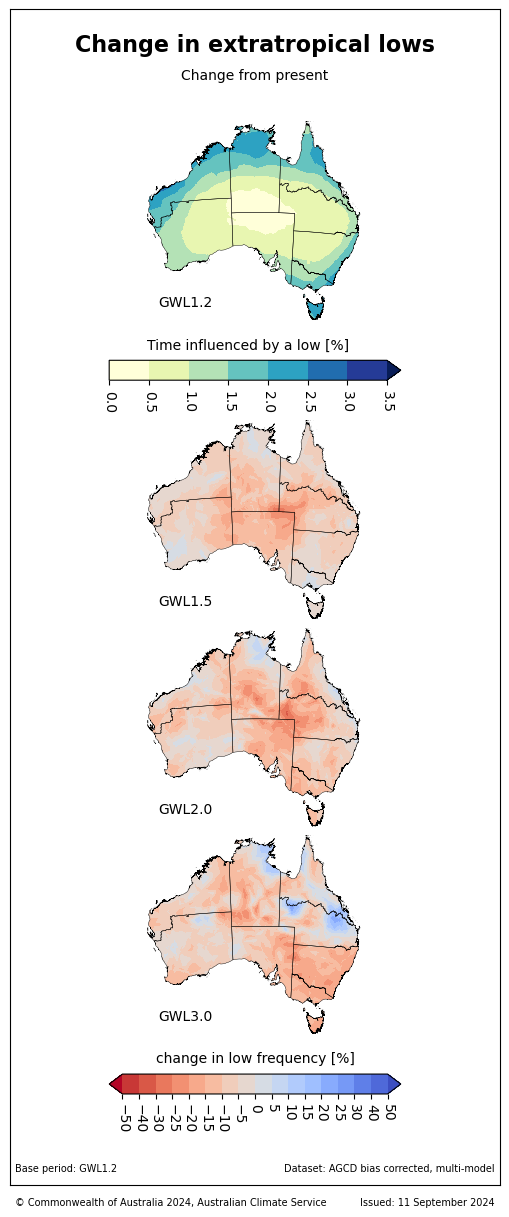

In [12]:
%%time
var = "low_freq"

ds_gwl12 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL12.nc")[var]*100
ds_gwl15 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL15_change.nc")[var]
ds_gwl20 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL20_change.nc")[var]
ds_gwl30 = xr.open_dataset(f"/g/data/ia39/ncra/extratropical_storms/5km/GWLs/lows_AGCD-05i_MM50_ssp370_v1-r1_GWL30_change.nc")[var]


gwl12_kwargs={"cmap": cmap_dict["pr"],
                 "cbar_extend":"max",
                 "ticks":np.arange(0,4, 0.5),
                 "tick_labels":None,
                 "cbar_label":"Time influenced by a low [%]"}

plot_acs_hazard_1plus3(ds_gwl12=ds_gwl12,
                         ds_gwl15=ds_gwl15,
                         ds_gwl20=ds_gwl20,
                         ds_gwl30=ds_gwl30,
                         title = "Change in extratropical lows",
                         baseline="GWL1.2",
                         date_range="Change from present",
                         cmap = cmap_dict["anom_coolwarm_r"],
                         ticks = [-50, -40, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 40, 50],
                         cbar_label = "change in low frequency [%]",
                         dataset_name = "AGCD bias corrected, multi-model",
                         cbar_extend="both",
                         watermark="",
                         gwl12_cmap=gwl12_kwargs["cmap"],
                         gwl12_cbar_extend= gwl12_kwargs["cbar_extend"],
                         gwl12_cbar_label= gwl12_kwargs["cbar_label"],
                         gwl12_ticks= gwl12_kwargs["ticks"],
                         gwl12_tick_labels=gwl12_kwargs["tick_labels"],
                       orientation="vertical"
                        )